import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("Churn_Modelling.csv")

In [11]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(10000, 14)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

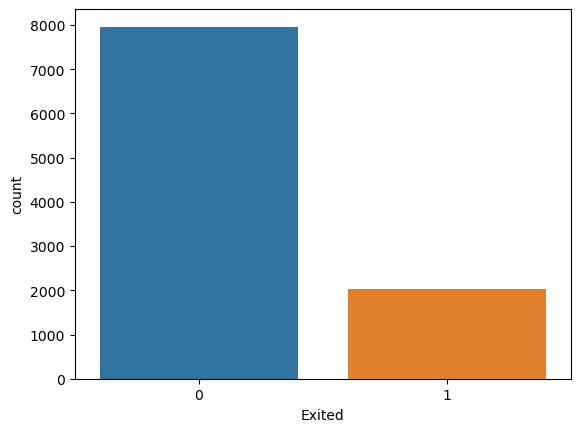

In [15]:
sns.countplot(df['Exited'])

In [16]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [17]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

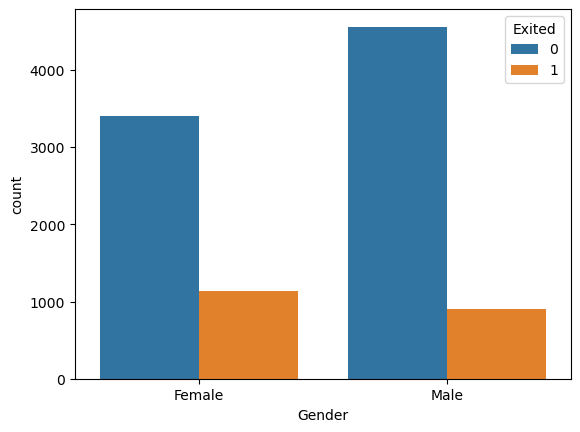

In [18]:
sns.countplot(x='Gender',hue='Exited',data=df)

In [19]:
#drop customer Id
df=df.drop('CustomerId',axis=1)

In [20]:
df.shape

(10000, 13)

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9884\1696928730.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:


In [23]:
df

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1115,228,0,0,24,2,0.00,0,1,1,101348.88,1
1,1,1177,217,2,0,23,1,83807.86,0,0,1,112542.58,0
2,2,2040,111,0,0,24,8,159660.80,2,1,0,113931.57,1
3,3,289,308,0,0,21,1,0.00,1,0,0,93826.63,0
4,4,1822,459,2,0,25,2,125510.82,0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1999,380,0,1,21,5,0.00,1,1,0,96270.64,0
9996,9996,1336,125,0,1,17,10,57369.61,0,1,1,101699.77,0
9997,9997,1570,318,0,0,18,7,0.00,0,0,1,42085.58,1
9998,9998,2345,381,1,1,24,3,75075.31,1,1,0,92888.52,1


In [24]:
x=df.drop('Exited',axis=1)

In [26]:
y=df.Exited
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_feature=ss.fit_transform(x)
x_feature

array([[-1.73187761, -0.46418322, -0.32733113, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.3909112 , -0.44133106, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479,  0.62898807, -1.53987591, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479,  0.07353887,  0.60539563, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 ,  0.98943914,  1.25830436, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761,  1.4692527 ,  1.46557697, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_feature,y,test_size=0.2,random_state=1)

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
predict=lr.predict(xtest)
lr.score(xtest,ytest)

0.8035

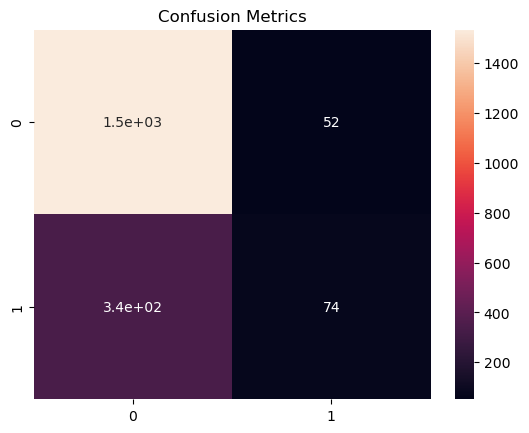

In [34]:
from sklearn.metrics import confusion_matrix
Cm=confusion_matrix(ytest,predict)
ax=plt.axes()
sns.heatmap(Cm, annot=True,
           annot_kws={'size':10},
            ax=ax
           )

plt.title("Confusion Metrics")
plt.show()

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1585
           1       0.59      0.18      0.27       415

    accuracy                           0.80      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.80      0.76      2000

